In [68]:
#Linear Regression Using Batch Gradient Descent

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#only for jupyter notebook
%matplotlib inline 

In [3]:
dataSet = 'data.xlsx'

In [4]:
#header = None states that there is no header row or else it would take first row of our data as header.
df = pd.read_excel(dataSet,sheet_name='Sheet1',header=None)

In [5]:
valueArray = df.to_numpy() #dataframe DF to numpyarray valueArray
m = valueArray.shape[0] # Number of training examples   numpyArray.shape = (no of rows,no of cols)
X = valueArray[0:,0:2] # Feature Vector [x1,x2] m*2 0: = 0,1,2 rows and 0:2 = 0,1 columns
X = np.insert(X,0,1,axis=1) # axis = 1 (every row insert 1 at 0 column) , Adding x0 = 1 in feature matrix m*3
y = valueArray[0:,2:] # Class label Vector [y]  0: = 0,1,2 rows and 2: = 2 column   y = m*1 matrix

In [6]:
#Normalization
X[0:,1:2] = (X[0:,1:2] - X[0:,1:2].mean())/(X[0:,1:2].std())
X[0:,2:] = (X[0:,2:] - X[0:,2:].mean())/(X[0:,2:].std())

In [7]:
#Implementing Batch Gradient Descent

In [8]:
def computeCostFunction(X,y,w):
    sum = 0.0
    for index in range(X.shape[0]):
        sum += (y[index][0] - (w[0][0] * X[index][0] + w[1][0] * X[index][1] + w[2][0] * X[index][2]))**2
        #print(sum)
    return 0.5 * (sum/m)

In [13]:
alpha = 0.13
iters = 1000
costs = []
iterations = []
weight1 = []
weight2 = []
np.random.seed(11) 
w = np.random.rand(3,1) #Weight matrix with random values 3*1 matrix
print(w)

[[0.18026969]
 [0.01947524]
 [0.46321853]]


In [ ]:
wts = []
for i in range(iters):
    #wj <- wj + for all points (h(x) - y)*xj
    sum0 = sum1 = sum2 = 0.0 # will hold new values of weights after weight update
    for xIndex in range(m):
        sum0 += (X[xIndex][0]*w[0][0] + X[xIndex][1]*w[1][0] + X[xIndex][2]*w[2][0] - y[xIndex][0])*X[xIndex][0]
        sum1 += (X[xIndex][0]*w[0][0] + X[xIndex][1]*w[1][0] + X[xIndex][2]*w[2][0] - y[xIndex][0])*X[xIndex][1]
        sum2 += (X[xIndex][0]*w[0][0] + X[xIndex][1]*w[1][0] + X[xIndex][2]*w[2][0] - y[xIndex][0])*X[xIndex][2]
    w[0][0] = w[0][0] - alpha*sum0/m
    w[1][0] = w[1][0] - alpha*sum1/m
    w[2][0] = w[2][0] - alpha*sum2/m
    cost = computeCostFunction(X,y,w)
    costs.append(cost)
    iterations.append(i+1)
    weight1.append(w[1][0])
    weight2.append(w[2][0])
    wts.append(w)
    if i == 0 :
        continue
    if abs(costs[i] - costs[i-1]) < 1e-10 :
        print(i)
    

99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344


In [16]:
#RESULTS

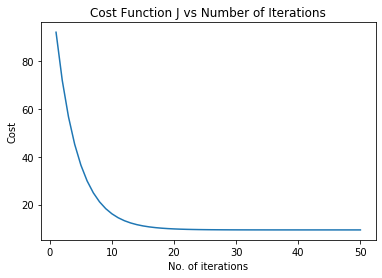

In [17]:
#2D - Plot of cost function vs number of iterations
plt.title('Cost Function J vs Number of Iterations')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(iterations,costs)
plt.show()

In [18]:
#3D plot

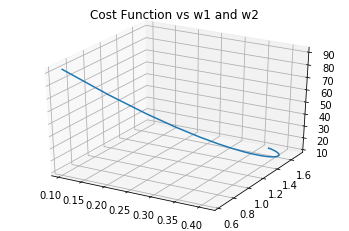

In [19]:
# weight1 = np.asarray(weight1)
# weight2 = np.asarray(weight2)
# costs = np.asarray(costs)
# costs = costs.reshape(-1,1).shape
# weight1 = weight1.reshape(-1,1).shape
# weight2 = weight2.reshape(-1,1).shape
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(weight1,weight2,costs)
plt.title("Cost Function vs w1 and w2")
plt.show()

In [20]:
#3D Surface Graph of cost function vs w1 and w2

AttributeError: 'list' object has no attribute 'shape'

In [24]:
W_arr = np.array(wts)

In [25]:
res = 100
bounds = [2,0.6]
xx = np.linspace((np.min(W_arr[:,1])-bounds[0]), (np.max(W_arr[:,1])+bounds[0]), res)
yy = np.linspace(np.min(W_arr[:,2])-bounds[1], np.max(W_arr[:,2])+bounds[1]+1, res)
minw0 = W_arr[-1][0][0]

r = np.ndarray((res,res))
s = np.ndarray((res,res))
z = np.ndarray((res,res))

In [27]:
for i in range(res):
    for j in range(res):
        z[i][j] = computeCostFunction(X, y, np.array([minw0,xx[i],yy[j]]).reshape(-1,1))
        r[i][j] = xx[i]
        s[i][j] = yy[j]

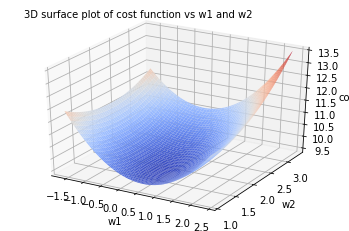

In [38]:
ax = plt.axes(projection='3d')
ax.plot_surface(r, s, z,cmap='coolwarm')
ax.text2D(0.05, 0.95, "3D surface plot of cost function vs w1 and w2", transform=ax.transAxes)
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("cost")
plt.show()